### Preliminaries
Loading data, defining lines 

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as pl
import visualize as vis
import danframe as dan
import kontin as con
import lines as lin
import numpy as np
import astropy.io.fits as fts

pl.rcParams["figure.figsize"] = (10,6) # Bigger figures
s6405_t5p = dan.frameseries("data/6405_aS1","top 5%")


# Load continuum contrast 
cont, =  fts.open("data/6405_aS1__concont.fits")

# Group cont with order value, sort by cont in decreasing order, then save only the top twelve frames
qual = [(x,i) for i,x in enumerate(cont.data)] ; qual.sort(key=lambda x: x[0],reverse=True)
s6405_t5p.frames = [s6405_t5p.frames[x[1]] for x in qual[:12]]
s6405_t5p.normalize()

block = s6405_t5p.frames[0].data

for frm in s6405_t5p.frames[1:]:
    block = np.vstack((block,frm.data))

CN, FeI, SiFe, myst, CNq = lin.make_lines_from_wins(s6405_t5p,s6405_t5p.pkwindows)

#Helpful constants
vel = 0; bot = 1; con = 2; err = 3; ew  = 4; mn  = 5; var = 6; ske = 7; kur = 8
mesFeI   = FeI.measure(s6405_t5p)
mesSiFe  = SiFe.measure(s6405_t5p)
mesmyst  = myst.measure(s6405_t5p)
mesCN    = CN.measure(s6405_t5p)
mesCNq   = CNq.measure(s6405_t5p)


/opt/miniconda/envs/master/lib/python3.5/site-packages/astropy/stats/bayesian_blocks.py:421: UserWarning: p0 does not seem to accurately represent the false positive rate for event data. It is highly recommended that you run random trials on signal-free noise to calibrate ncp_prior to achieve a desired false positive rate.
  warnings.warn('p0 does not seem to accurately represent the false '


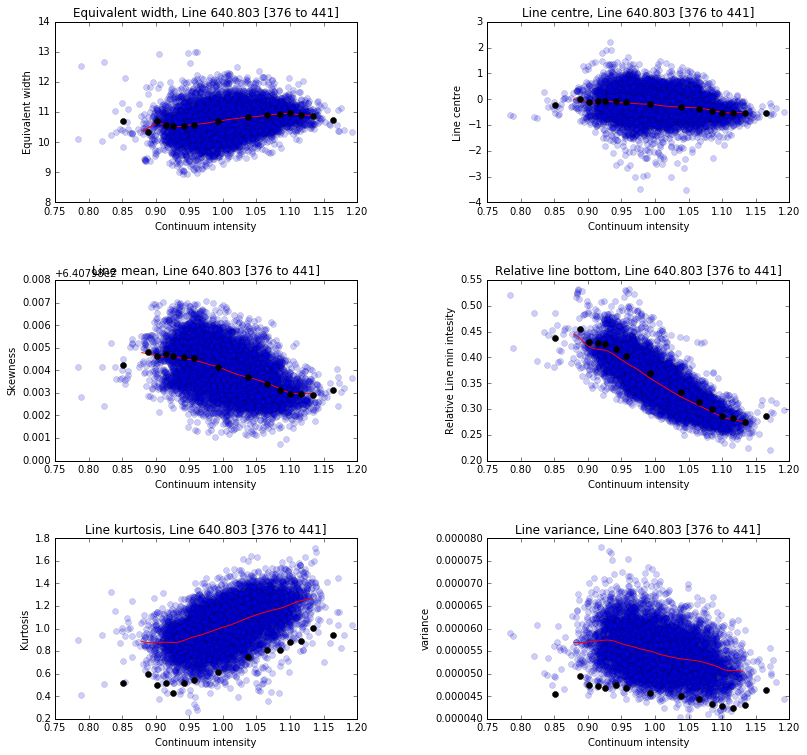

In [2]:
quant = mesFeI[con].reshape(-1)
cuts  = mesFeI[err] < np.percentile(mesFeI[err],89)
binFeI = lin.binned_framegroup(FeI,s6405_t5p,quant,cuts)
mesBinnFeI = binFeI.measure()

pl.rcParams["figure.figsize"] = (12,11)
vis.plot_linemap(mesFeI,FeI,binned=(mesBinnFeI,binFeI.cont.reshape(-1)))

#### Reference chart

Wavelength bin:  640.61008162
Wavelength bin:  640.603738889
Wavelength bin:  640.59739548
Wavelength bin:  640.591051394
Wavelength bin:  640.58470663
Wavelength bin:  640.578361188
Wavelength bin:  640.572015069
Wavelength bin:  640.565668273
Wavelength bin:  640.559320799
Wavelength bin:  640.552972648
Wavelength bin:  640.546623819
Wavelength bin:  640.540274312
Wavelength bin:  640.533924129


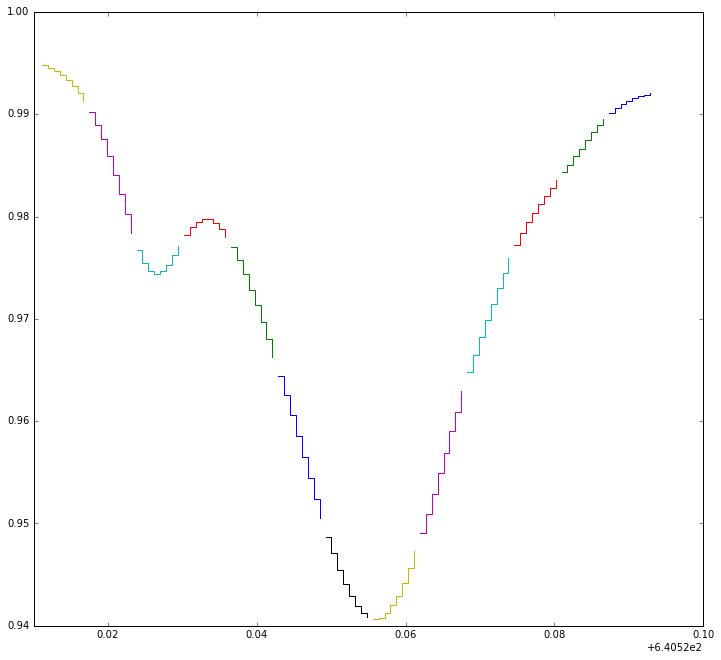

In [3]:
line = myst
step = 6; i = 0; ip1 = i+step; #FeI magic number
step = 8; i = 0; ip1 = i+step; #myst magic number
nbin = int(len(line.idx)/step)
lmbd = s6405_t5p.lmbd[line.idx]

for j in range(0,nbin):
    print("Wavelength bin: ",np.mean(lmbd[slice(i,ip1)]))
    pl.step(lmbd[slice(i,ip1)],s6405_t5p.ref[line.idx[slice(i,ip1)]])            
    i   =  ip1
    ip1 += step
pl.show()

In [4]:
len(myst.idx)/8

13.0

In [5]:
pl.rcParams["figure.figsize"] = (8,6)

if False:
    line = FeI
    step = 6 #FeI number
    cuts  = mesFeI[err] < np.percentile(mesFeI[err],95)    
    quant = mesFeI[con].reshape(-1)
    quant = quant[cuts.reshape(-1)].reshape(-1)
    sort = binFeI.partition_data(quant)
    binned = binFeI
    

if True:
    line = myst    
    step = 8 #myst number
    cuts  = mesmyst[err] < np.percentile(mesmyst[err],95)
    quant = mesmyst[con].reshape(-1)
    quant = quant[cuts.reshape(-1)].reshape(-1)
    sort  = binMyst.partition_data(quant)
    binned = binMyst
    
binnr = np.unique(sort)

i    = 0
ip1  = i+step
nbin = int(len(line.idx)/step)
lmbd = s6405_t5p.lmbd[line.idx]
cores= []
for nr in binnr[1:]:
    #print(nr, "Continium bin",binFeI.bins[nr])
    res  = np.zeros((nbin,2))
    for j in range(0,nbin):
        #print("Wavelength bin: ",np.mean(lmbd[slice(i,ip1)]))
        #print("Events: ",binFeI.counts[nr-1],(sort == nr).sum())
        # Shows distribution of intensities in eleven wavelenght bins across the line
        # for each continium bin. Pretty hard to get any real grip on the data from this
        #pl.hist(block[:,FeI.idx[slice(i,ip1)]][sort == nr,:].reshape(-1));pl.show()

        tmp      =  (block[cuts.reshape(-1),:][:,line.idx[slice(i,ip1)]][sort == nr,:] - binned.data[nr-1,slice(i,ip1)])
        res[j,:] =  np.mean(lmbd[slice(i,ip1)]), ( tmp[tmp>=0].sum()/-tmp[tmp < 0].sum())
        a,b = np.histogram(tmp[tmp >= 0],13)
        c,d = np.histogram(tmp[tmp <  0],13)
#        print(b,d)
        #pl.hist( (block[cuts.reshape(-1),:][:,line.idx[slice(i,ip1)]][sort == nr,:] - binned.data[nr-1,slice(i,ip1)]).reshape(-1));pl.show()
                
        i   =  ip1
        ip1 += step
    cores.append(res)
    i    = 0
    ip1  = i+step

NameError: name 'binned' is not defined

In [ ]:
#print(cores)
b0 = [core[0,1] for core in cores]
b1 = [core[1,1] for core in cores]
b2 = [core[2,1] for core in cores]
b3 = [core[3,1] for core in cores]
b4 = [core[4,1] for core in cores]
b5 = [core[5,1] for core in cores]
b6 = [core[6,1] for core in cores]
b7 = [core[7,1] for core in cores]
b8 = [core[8,1] for core in cores]
b9 = [core[9,1] for core in cores]
b10= [core[10,1] for core in cores]


pl.plot(np.ones(14)*cores[0][0,0], b0,'o')
pl.plot(np.ones(14)*cores[0][1,0], b1,'o')
pl.plot(np.ones(14)*cores[0][2,0], b2,'o')
pl.plot(np.ones(14)*cores[0][3,0], b3,'o')
pl.plot(np.ones(14)*cores[0][4,0], b4,'o')
pl.plot(np.ones(14)*cores[0][5,0], b5,'o')
pl.plot(np.ones(14)*cores[0][6,0], b6,'o')
pl.plot(np.ones(14)*cores[0][7,0], b7,'o')
pl.plot(np.ones(14)*cores[0][8,0], b8,'o')
pl.plot(np.ones(14)*cores[0][9,0], b9,'o')
pl.plot(np.ones(14)*cores[0][10,0],b10,'o')

In [ ]:
a,b = cores[0][:,0], cores[0][:,1]
pl.step(a,b)
a,b = cores[1][:,0]+0.0003, cores[1][:,1]
pl.step(a,b)
a,b = cores[2][:,0]-0.0003, cores[2][:,1]
pl.step(a,b)
a,b = cores[3][:,0], cores[3][:,1]
pl.step(a,b)
pl.show()

In [ ]:
cores

In [ ]:
lmb  = s6405_t5p.lmbd[myst.idx]
quant = mesmyst[con].reshape(-1)
cuts  = mesmyst[err] < np.percentile(mesmyst[err],95)
binMyst = lin.binned_framegroup(myst,s6405_t5p,quant,cuts)
mesBinnMyst = binMyst.measure()

pl.rcParams["figure.figsize"] = (12,11)
vis.plot_linemap(mesmyst,myst,binned=(mesBinnMyst,binMyst.cont.reshape(-1)))

In [ ]:
lmb  = s6405_t5p.lmbd[myst.idx]
quant = mesmyst[con].reshape(-1)
cuts  = mesmyst[err] < np.percentile(mesmyst[err],95)
binned = lin.binned_framegroup(myst,s6405_t5p,quant,cuts)
mesBinnMyst = binMyst.measure()

pl.rcParams["figure.figsize"] = (12,11)
vis.plot_linemap(mesmyst,myst,binned=(mesBinnMyst,binMyst.cont.reshape(-1)))

Mean seems to be a bit higher for the binned than for the random curves, and this appears a somewhat plausible description of how things are from small random sampling of the binned vs the raw spectra.

In [ ]:
def moments(x,lines):
    rows = len(lines)    
    mu, mu2, mu3, mu4 = np.zeros(rows),np.zeros(rows),np.zeros(rows),np.zeros(rows)
    for i in range(0,rows):
        line = lines[i]
        dpdf = (1-line/line.max())
        dpdf = dpdf/dpdf.sum()
        mu[i] = np.sum(dpdf*x) # Reshaping enables broadcasting
        mu2[i]= np.sum(dpdf*(x-mu[i])**2)
        mu3[i]= np.sum(dpdf*(x-mu[i])**3)
        mu4[i]= np.sum(dpdf*(x-mu[i])**4)

    skew = mu3/mu2**(3/2) 
    kurt = (mu4/mu2**2 - 3)
    return mu,mu2,skew,kurt

In [ ]:
sort = np.digitize(mesFeI[con][cuts],binFeI.bins[:-1])
pl.rcParams["figure.figsize"] = (10,6) # Bigger figures
i  = 8 
nrand = 12
lmb  = s6405_t5p.lmbd[FeI.idx]

idx,  = np.where((sort == i))
idx   = np.random.choice(idx,nrand)
dat = [block[idx[i],FeI.idx] for i in range(0,nrand)]
       
meslo = moments(lmb,dat)


pl.step(lmb,block[idx[0],FeI.idx],'b',alpha=0.5)
pl.plot(mesFeI[mn][0,idx[0]]*np.ones(2),[0.92,1.02],'-.b',alpha=0.4)
pl.step(lmb,block[idx[2],FeI.idx],'b',alpha=0.5)
pl.plot(mesFeI[mn][0,idx[2]]*np.ones(2),[0.92,1.02],'-.b',alpha=0.4)
pl.step(lmb,block[idx[2],FeI.idx],'b',alpha=0.5)
pl.plot(mesFeI[mn][0,idx[2]]*np.ones(2),[0.92,1.02],'-.b',alpha=0.4)



pl.step(lmb,binFeI.data[i-1],'r')
pl.plot(mesBinnFeI[mn-1][i-1]*np.ones(2),[0.92,1.02],'-.r',alpha=0.4)
pl.show()

print("Binned: mn {:.4f}, var {:.5f}, skew {:.4f}, kur {:.4f}".format(mesBinnFeI[mn-1][i],
                                                      mesBinnFeI[var-1][i],
                                                      mesBinnFeI[ske-1][i],
                                                      mesBinnFeI[kur-1][i]))
print("Local:  mn {:.4f}, var {:.5f}, skew {:.4f}, kur {:.4f}".format(meslo[0][0],
                                                      meslo[1][0],
                                                      meslo[2][0],
                                                      meslo[3][0]))
print("Local:  mn {:.4f}, var {:.5f}, skew {:.4f}, kur {:.4f}".format(meslo[0][1],
                                                      meslo[1][1],
                                                      meslo[2][1],
                                                      meslo[3][1]))
print("Local:  mn {:.4f}, var {:.5f}, skew {:.4f}, kur {:.4f}".format(meslo[0][2],
                                                      meslo[1][2],
                                                      meslo[2][2],
                                                      meslo[3][2]))
print("Local:  mn {:.4f}, var {:.5f}, skew {:.4f}, kur {:.4f}".format(meslo[0][3],
                                                      meslo[1][3],
                                                      meslo[2][3],
                                                      meslo[3][3]))
